In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_Wc8LBpr.csv to train_Wc8LBpr.csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving test_VsU9xXK.csv to test_VsU9xXK.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train_Wc8LBpr.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test_VsU9xXK.csv']))

In [ ]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [ ]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [ ]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [ ]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [ ]:
print('the shape of train data is: ', train.shape)
print('the shape of test data is: ', test.shape)

the shape of train data is:  (131662, 14)
the shape of test data is:  (87395, 13)


Exploratory Data Analysis

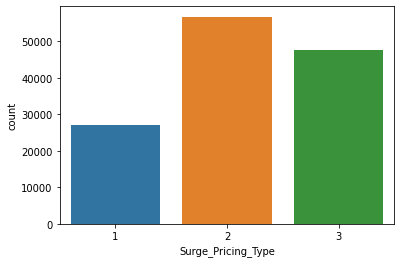

In [ ]:
sns.countplot(train['Surge_Pricing_Type'])

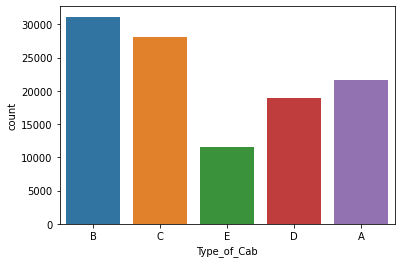

In [ ]:
sns.countplot(train['Type_of_Cab'])

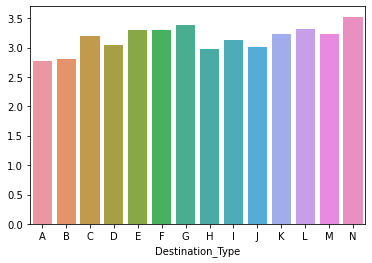

In [ ]:
x = train.groupby("Destination_Type")["Customer_Rating"].mean().index
y=train.groupby("Destination_Type")["Customer_Rating"].mean().values
sns.barplot(x,y)

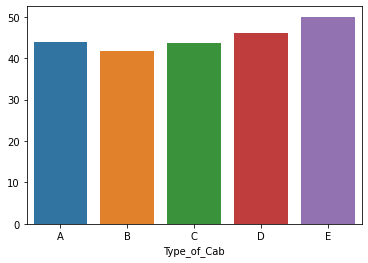

In [ ]:
x = train.groupby("Type_of_Cab")["Trip_Distance"].mean().index
y=train.groupby("Type_of_Cab")["Trip_Distance"].mean().values
sns.barplot(x,y)

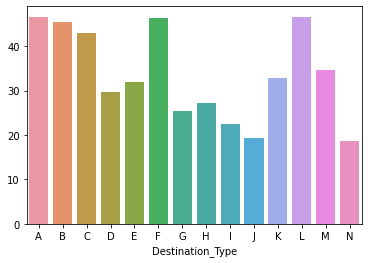

In [ ]:
x = train.groupby("Destination_Type")["Trip_Distance"].mean().index
y=train.groupby("Destination_Type")["Trip_Distance"].mean().values
sns.barplot(x,y)

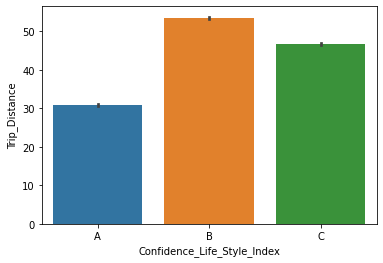

In [ ]:
sns.barplot(x = 'Confidence_Life_Style_Index', y ='Trip_Distance', data = train)

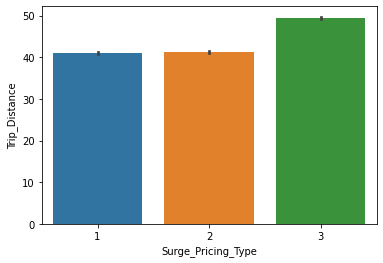

In [ ]:
sns.barplot(x= 'Surge_Pricing_Type', y = 'Trip_Distance', data = train)

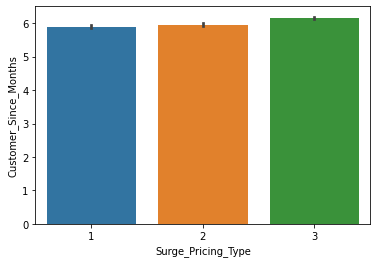

In [ ]:
sns.barplot(x ='Surge_Pricing_Type', y= 'Customer_Since_Months', data = train)

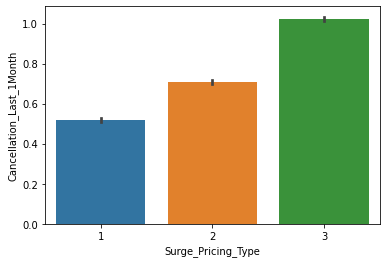

In [ ]:
sns.barplot(y ='Cancellation_Last_1Month', data = train, x ='Surge_Pricing_Type')

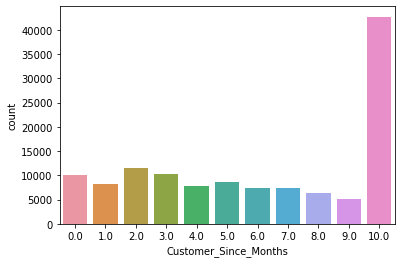

In [ ]:
sns.countplot(train["Customer_Since_Months"])

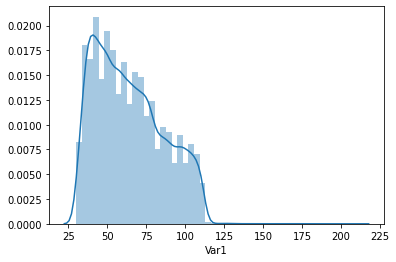

In [ ]:
sns.distplot(train['Var1'])

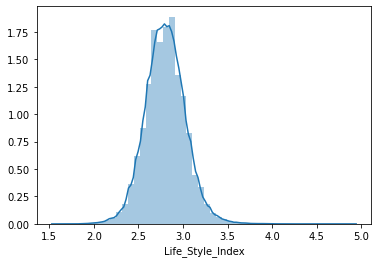

In [ ]:
sns.distplot(train["Life_Style_Index"])
plt.show()

In [ ]:
train['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

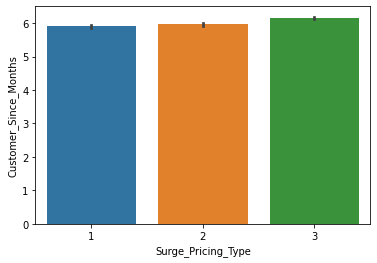

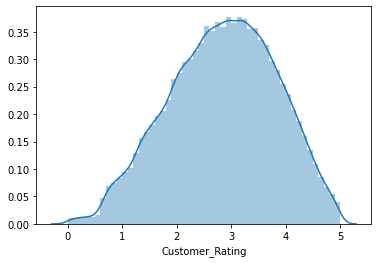

In [ ]:
sns.distplot(train["Customer_Rating"])
plt.show()

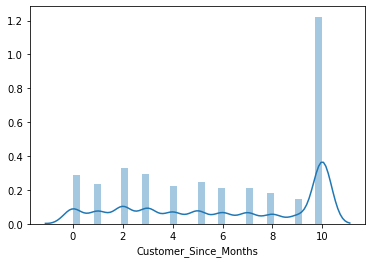

In [ ]:
sns.distplot(train['Customer_Since_Months'])

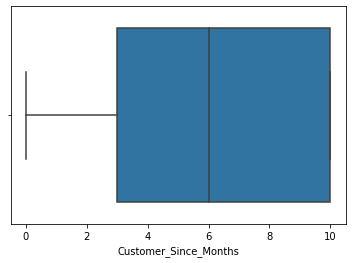

In [ ]:
sns.boxplot('Customer_Since_Months', data = train)

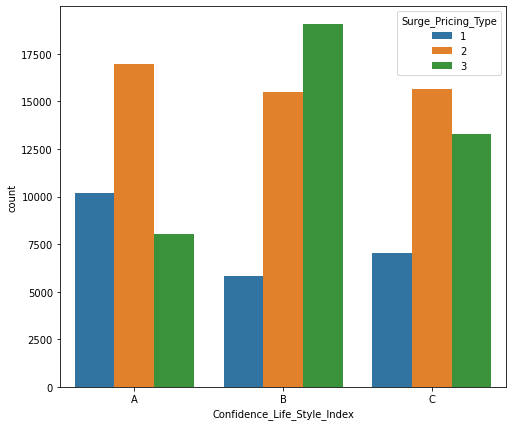

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Confidence_Life_Style_Index', hue = 'Surge_Pricing_Type', data = train)

In [ ]:
train['Confidence_Life_Style_Index'].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

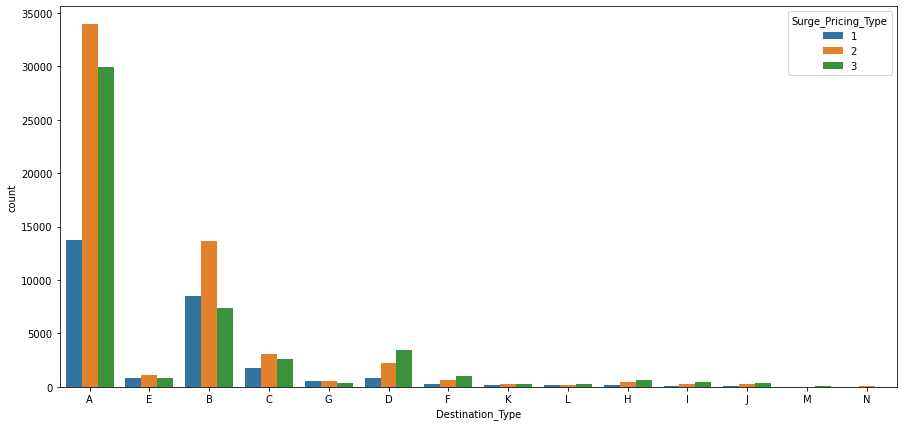

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Destination_Type', hue = 'Surge_Pricing_Type', data = train)

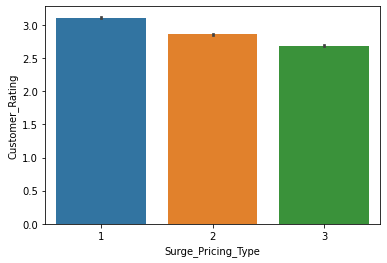

In [ ]:
sns.barplot(y ='Customer_Rating', data = train, x ='Surge_Pricing_Type')

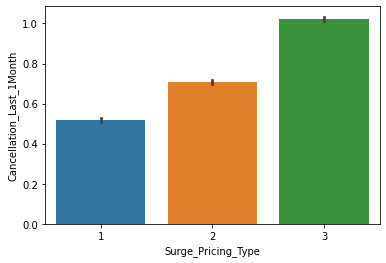

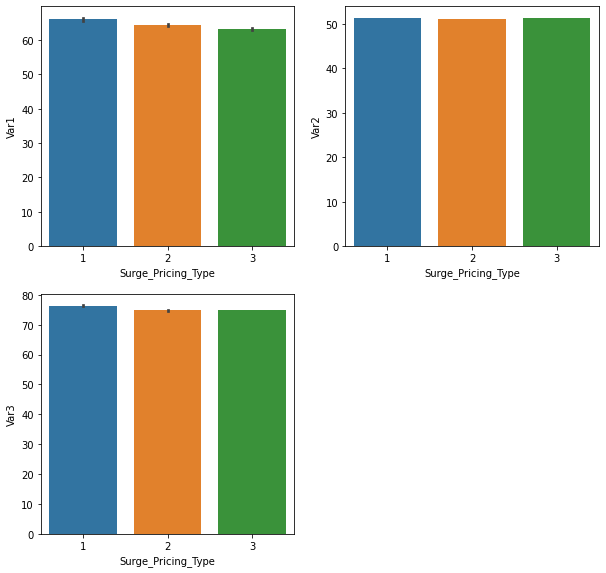

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.barplot(y ='Var1', data = train, x ='Surge_Pricing_Type')
plt.subplot(3,2,2)
sns.barplot(y ='Var2', data = train, x ='Surge_Pricing_Type')
plt.subplot(3,2,3)
sns.barplot(y ='Var3', data = train, x ='Surge_Pricing_Type')
plt.show()

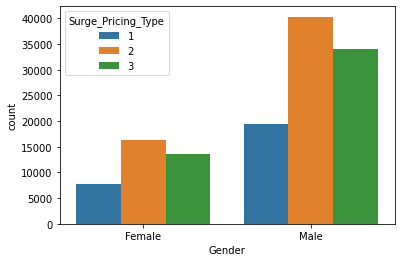

In [ ]:
sns.countplot(x = 'Gender', hue = 'Surge_Pricing_Type', data = train)

In [ ]:
#sns.pairplot(train, hue = 'Surge_Pricing_Type')

Feature Engineering

In [ ]:
train["Trip_Distance_per_destType"] = train["Trip_Distance"]/train.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
train["Trip_Distance_per_CabType"] = train["Trip_Distance"]/train.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
train["Trip_Distance_per_lifeStyle"] = train["Trip_Distance"]/train.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')


test["Trip_Distance_per_destType"] = test["Trip_Distance"]/test.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
test["Trip_Distance_per_CabType"] = test["Trip_Distance"]/test.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
test["Trip_Distance_per_lifeStyle"] = test["Trip_Distance"]/test.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')

In [ ]:
all_data = pd.concat([train, test])

In [ ]:
cat_cols = ["Type_of_Cab", "Confidence_Life_Style_Index", "Destination_Type", "Gender"]
all_data= pd.get_dummies(all_data, columns=cat_cols)

In [ ]:
all_data.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Trip_Distance_per_destType,Trip_Distance_per_CabType,Trip_Distance_per_lifeStyle,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2.0,0.145168,0.162634,0.219152,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2.0,0.631918,0.707949,0.550570,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,41.58,10.0,NaN,3.50125,2,NaN,56,77,2.0,1.299231,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,T0005689465,61.56,10.0,NaN,3.45375,0,NaN,52,74,3.0,1.320017,1.410791,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2.0,1.178280,1.259308,1.026598,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_len = train.shape[0]
test_len = train.shape[0]

train = all_data[:train_len]
test = all_data[train_len:]

In [ ]:
target_map = {1:0, 2:1, 3:2}
target_map_inverse = {0:1, 1:2, 2:3}

In [ ]:
train["Surge_Pricing_Type"] = train["Surge_Pricing_Type"].map(target_map)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
features = [col for col in train.columns if col not in ["Trip_ID", "Surge_Pricing_Type"]]
target = train["Surge_Pricing_Type"]

In [ ]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'device':'gpu',
    'verbosity': 1
}

In [ ]:
import lightgbm as lgb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(test), 3))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(sklearn.metrics.accuracy_score(predictions_val, target.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

Fold 0


LightGBMError: ignored

In [ ]:
#test['Confidence_Life_Style_Index'].fillna(test['Type_of_Cab'].mode()[0], inplace = True)

In [ ]:
train['Customer_Since_Months'].fillna(6, inplace = True)

In [ ]:
test['Customer_Since_Months'].fillna(6, inplace = True)

In [ ]:
train.isnull().sum()

Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [ ]:
train['Var1'].fillna(train['Var1'].mean(), inplace = True)

In [ ]:
test['Var1'].fillna(test['Var1'].mean(), inplace = True)

In [ ]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender,Surge_Pricing_Type
0,6.77,B,1.0,A,A,3.90500,0,40.000000,Female,2
1,29.47,B,10.0,B,A,3.45000,0,38.000000,Male,2
2,41.58,B,10.0,B,E,3.50125,2,64.202698,Male,2
3,61.56,C,10.0,B,A,3.45375,0,64.202698,Male,3
4,54.95,C,10.0,B,A,3.40250,4,51.000000,Male,2


In [ ]:
train.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [ ]:
#np.max(train['Customer_Rating'])

Feature Engineering

In [ ]:
train['Destination_Type'] =train['Destination_Type'].astype('category')
train['Destination_Type'] = train['Destination_Type'].cat.codes
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender,Surge_Pricing_Type
0,6.77,B,1.0,A,0,3.90500,0,40.000000,Female,2
1,29.47,B,10.0,B,0,3.45000,0,38.000000,Male,2
2,41.58,B,10.0,B,4,3.50125,2,64.202698,Male,2
3,61.56,C,10.0,B,0,3.45375,0,64.202698,Male,3
4,54.95,C,10.0,B,0,3.40250,4,51.000000,Male,2


In [ ]:
train['Type_of_Cab'] =train['Type_of_Cab'].astype('category')
train['Type_of_Cab'] = train['Type_of_Cab'].cat.codes
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender,Surge_Pricing_Type
0,6.77,1,1.0,A,0,3.90500,0,40.000000,Female,2
1,29.47,1,10.0,B,0,3.45000,0,38.000000,Male,2
2,41.58,1,10.0,B,4,3.50125,2,64.202698,Male,2
3,61.56,2,10.0,B,0,3.45375,0,64.202698,Male,3
4,54.95,2,10.0,B,0,3.40250,4,51.000000,Male,2


In [ ]:
train['Confidence_Life_Style_Index'] =train['Confidence_Life_Style_Index'].astype('category')
train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].cat.codes
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender,Surge_Pricing_Type
0,6.77,1,1.0,0,0,3.90500,0,40.000000,Female,2
1,29.47,1,10.0,1,0,3.45000,0,38.000000,Male,2
2,41.58,1,10.0,1,4,3.50125,2,64.202698,Male,2
3,61.56,2,10.0,1,0,3.45375,0,64.202698,Male,3
4,54.95,2,10.0,1,0,3.40250,4,51.000000,Male,2


In [ ]:
train['Gender'] = np.where(train['Gender'] == "Male", 1 ,0)

In [ ]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender,Surge_Pricing_Type
0,6.77,1,1.0,0,0,3.90500,0,40.000000,0,2
1,29.47,1,10.0,1,0,3.45000,0,38.000000,1,2
2,41.58,1,10.0,1,4,3.50125,2,64.202698,1,2
3,61.56,2,10.0,1,0,3.45375,0,64.202698,1,3
4,54.95,2,10.0,1,0,3.40250,4,51.000000,1,2


Scaling the data in order to avoid inconsistency in model

In [ ]:
X = train.copy()
X = X.drop('Surge_Pricing_Type', axis = 1)

In [ ]:
X.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender
0,6.77,1,1.0,0,0,3.90500,0,40.000000,0
1,29.47,1,10.0,1,0,3.45000,0,38.000000,1
2,41.58,1,10.0,1,4,3.50125,2,64.202698,1
3,61.56,2,10.0,1,0,3.45375,0,64.202698,1
4,54.95,2,10.0,1,0,3.40250,4,51.000000,1


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = pd.DataFrame(scaler.fit_transform(train_scale), columns= train_scale.columns)
#test_X = pd.DataFrame(scaler.transform(test.iloc[:,1:]), columns = test.iloc[:,1:].columns)

In [ ]:
y = train['Surge_Pricing_Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =100)

Buils a model using the above scaled values

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
def trainModel(model, X_train, X_test, y_train, y_test):
    model_train = model.fit(X_train, y_train)
    pred = model_train.predict(X_test)
    accu = accuracy_score(y_test, pred)
    print(classification_report(y_test, pred))
    print('the score of model is', accu)

In [ ]:
trainModel(LogisticRegression(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.73      0.50      0.59      5414
           2       0.60      0.73      0.66     11470
           3       0.63      0.59      0.61      9449

    accuracy                           0.63     26333
   macro avg       0.66      0.61      0.62     26333
weighted avg       0.64      0.63      0.63     26333

the score of model is 0.630919378726313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
trainModel(RandomForestClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.69      0.52      0.60      5414
           2       0.63      0.77      0.69     11470
           3       0.69      0.60      0.64      9449

    accuracy                           0.66     26333
   macro avg       0.67      0.63      0.64     26333
weighted avg       0.66      0.66      0.65     26333

the score of model is 0.6579576956670338


In [ ]:
trainModel(BaggingClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.60      0.54      0.57      5414
           2       0.62      0.71      0.66     11470
           3       0.66      0.58      0.62      9449

    accuracy                           0.63     26333
   macro avg       0.63      0.61      0.62     26333
weighted avg       0.63      0.63      0.63     26333

the score of model is 0.6287927695287282


In [ ]:
trainModel(AdaBoostClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.74      0.53      0.62      5414
           2       0.64      0.80      0.71     11470
           3       0.70      0.59      0.64      9449

    accuracy                           0.67     26333
   macro avg       0.69      0.64      0.66     26333
weighted avg       0.68      0.67      0.67     26333

the score of model is 0.6718186306155775


In [ ]:
trainModel(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.75      0.52      0.62      5414
           2       0.63      0.85      0.73     11470
           3       0.74      0.57      0.64      9449

    accuracy                           0.68     26333
   macro avg       0.71      0.65      0.66     26333
weighted avg       0.70      0.68      0.67     26333

the score of model is 0.6809326700337979


In [ ]:
trainModel(xgb.XGBClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.75      0.52      0.62      5414
           2       0.63      0.85      0.73     11470
           3       0.75      0.56      0.64      9449

    accuracy                           0.68     26333
   macro avg       0.71      0.64      0.66     26333
weighted avg       0.70      0.68      0.67     26333

the score of model is 0.6798313902707629


Hyperparameters Tuning on Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_GB = GradientBoostingClassifier()

In [ ]:
#model_GB.fit(X_train, y_train)

In [ ]:
#params = {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100,150,200,250,300], 'max_depth': np.arange(3,7)}
#model_cv = GridSearchCV(model_GB, param_grid=params, scoring='accuracy', cv =5)

In [ ]:
#trainModel(model_cv, X_train, X_test, y_train, y_test)

In [ ]:
#model_cv.best_params_

In [ ]:
model_gb_improved = GradientBoostingClassifier(learning_rate=0.1, n_estimators=350, max_depth=4)

In [ ]:
trainModel(model_gb_improved, X_train, X_test, y_train, y_test) 

              precision    recall  f1-score   support

           1       0.76      0.52      0.62      5414
           2       0.64      0.83      0.72     11470
           3       0.73      0.59      0.65      9449

    accuracy                           0.68     26333
   macro avg       0.71      0.65      0.66     26333
weighted avg       0.70      0.68      0.67     26333

the score of model is 0.680552918391372


Prediction on test data

In [ ]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender
0,T0005689459,9.44,A,10.0,A,B,3.68000,2,63.93661,Male
1,T0005689462,32.15,B,10.0,A,A,1.59375,0,65.00000,Female
2,T0005689463,10.38,C,4.0,A,D,4.50500,0,63.93661,Male
3,T0005689466,14.94,B,6.0,C,E,4.53000,0,63.00000,Male
4,T0005689468,32.03,B,7.0,A,K,4.60125,3,96.00000,Male


In [ ]:
test.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Gender                         0
dtype: int64

In [ ]:
test = test.dropna()

In [ ]:
test['Destination_Type'] =test['Destination_Type'].astype('category')
test['Destination_Type'] = test['Destination_Type'].cat.codes
test.head()
test['Type_of_Cab'] =test['Type_of_Cab'].astype('category')
test['Type_of_Cab'] = test['Type_of_Cab'].cat.codes
test.head()
test['Confidence_Life_Style_Index'] =test['Confidence_Life_Style_Index'].astype('category')
test['Confidence_Life_Style_Index'] = test['Confidence_Life_Style_Index'].cat.codes
test.head()
test['Gender'] = np.where(test['Gender'] == "Male", 1 ,0)
test.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Gender                         0
dtype: int64

In [ ]:
test.shape

(87395, 10)

In [ ]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Gender
0,T0005689459,9.44,0,10.0,0,1,3.68000,2,63.93661,1
1,T0005689462,32.15,1,10.0,0,0,1.59375,0,65.00000,0
2,T0005689463,10.38,2,4.0,0,3,4.50500,0,63.93661,1
3,T0005689466,14.94,1,6.0,2,4,4.53000,0,63.00000,1
4,T0005689468,32.03,1,7.0,0,10,4.60125,3,96.00000,1


In [ ]:
predictions = model_gb_improved.predict(test.iloc[:,1:])

In [ ]:
test_review_final = pd.DataFrame(predictions, columns=['Surge_Pricing_Type'])

In [ ]:
test_review_final['Trip_ID'] = test['Trip_ID']

In [ ]:
test_review_final = test_review_final[['Trip_ID', 'Surge_Pricing_Type']]

In [ ]:
test_review_final.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
